In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
year = 8736
debete = 24*90+1
finete = year-debete

### Choix de ne pas augmenter les gisements existant en 2020 - La seule extension de DR vient des nouveaux usages flexibles et de l'accroissement de la population

In [3]:
taux_croiss_conso_indus = 180/115 
taux_croiss_conso_ter = 110/105.667
taux_croiss_conso_res = 135/156
taux_croiss_conso_res

0.8653846153846154

# Shedding

In [4]:
def dr_indus(Wyear,frev,sutil,smax,smin):
    return (smax-smin)*Wyear/(8760*(1-frev)*sutil) *1e3

## Steel industry - shedding

In [5]:
Aturbsteel = np.ones(year)
capasteel = 4517/year * 1e3 #MW
capasteel=dr_indus(4517,0.05,1,1,0)
prix = 411
duree = 4 #h
Nact = 50
caracsteel = [prix,capasteel,duree,Nact]
caracsteel

[411, 542.7781783225187, 4, 50]

## Aluminium industry

In [6]:
Aturbalu = np.ones(year)
capaalu = 0.25*5028/year * 1e3 #MW
capaalu=dr_indus(5028,0.05,0.95,1,0.75)
prix = 164
duree = 4 #h
Nact = 50
caracalu = [prix,capaalu,duree,Nact]
caracalu

[164, 158.99518081432853, 4, 50]

## Chlorine industry

In [7]:
Aturbchlorine = np.ones(year)
capachlorine = 0.6*0.95*3434/8736 * 1e3 #MW
capachlorine = dr_indus(3434,0.05,0.95,1,0.4) #MW
prix = 96
duree = 4 #h
Nact = 50
caracchlor = [prix,capachlorine,duree,Nact]
caracchlor

[96, 260.6154896975676, 4, 50]

## Hydrogene

In [8]:
Aturbhydro = np.ones(year)
capahydro = 50000/year * 1e3 #MW
prix = 100
duree = 4 #h
Nact = 50
carachydro = [prix,capahydro,duree,Nact]
carachydro

[100, 5723.443223443223, 4, 50]

In [9]:
df_avail_shedding = pd.DataFrame({"Tech. 0":Aturbsteel,"Tech. 1":Aturbalu,"Tech. 2":Aturbchlorine,"Tech. 3":Aturbhydro})
df_avail_shedding.to_csv("loadshedding_availability.csv")

In [10]:
df_carac_shed = pd.DataFrame({"Steel":caracsteel,
                             "Aluminium":caracalu,
                             "Chlorine":caracchlor,
                             "Hydrogene":carachydro}, 
                             index = ["PrixAct","CapaInst","Duree","NAct"])
bon = df_carac_shed.T
bon

,PrixAct,CapaInst,Duree,NAct
Steel,411.0,542.778178,4.0,50.0
Aluminium,164.0,158.995181,4.0,50.0
Chlorine,96.0,260.615490,4.0,50.0
Hydrogene,100.0,5723.443223,4.0,50.0


In [11]:
cmoy = []
for i,tech in enumerate(list(bon.index)):
    cmoy.append(np.mean(bon['CapaInst'].loc[tech] * np.array(df_avail_shedding["Tech. %s"%i])))

In [12]:
bon['Capamoy'] = cmoy
bon

,PrixAct,CapaInst,Duree,NAct,Capamoy
Steel,411.0,542.778178,4.0,50.0,542.778178
Aluminium,164.0,158.995181,4.0,50.0,158.995181
Chlorine,96.0,260.615490,4.0,50.0,260.615490
Hydrogene,100.0,5723.443223,4.0,50.0,5723.443223


In [13]:
bon.to_csv("carac_shedding.csv")

# Shifting

## Cement industry

In [14]:
weekend = [1 for i in range(24)]
weekdays = [1,1,1,1,1,1,0.95,0.85,0.75,0.7,0.66,0.66,0.66,0.75,0.75,0.75,0.66,0.7,0.85,0.95,1,1,1,1]
winter = 1
summer = 0.8

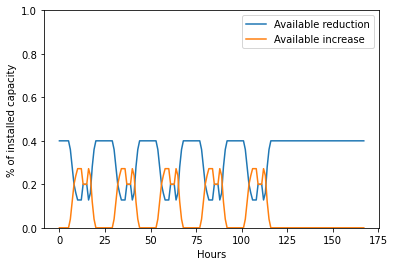

In [15]:
smin = 0.5
smax = 1
Aturbcement = []
Apumpcement = []
for h in range(year):
    if h < debete or h > finete:
        multsaison = 0.8
    else:
        multsaison = 1
    day = h // 24
    if day % 7 == 5:
        #samedi
        d = weekend[h % 24]
    elif day % 7 == 6:
        #dimanche
        d = weekend[h % 24]
    else:
        #weekdays
        d = weekdays[h % 24]

    Aturbcement.append(multsaison*(d-smin))
    Apumpcement.append(multsaison*(smax-d))
plt.figure()
plt.plot(Aturbcement[:168],label="Available reduction")
plt.plot(Apumpcement[:168],label="Available increase")
plt.ylabel("% of installed capacity")
plt.xlabel("Hours")
plt.ylim((0,1))
plt.legend()
plt.show()

In [16]:
capacement = dr_indus(2810,0.05,1,1,0)
prix = 10 #euro/MW
duree = 3 #h
Nact = 260
caraccement = [prix,capacement,duree,Nact]
caraccement

[10, 337.65921653448686, 3, 260]

## Paper and pulp

In [17]:
capulp = dr_indus(10598,0.05,1,1,0)
capap = dr_indus(2572,0.05,1,1,0)
capaturb = 0.8*capulp + 0.2*capap
capapump = 0.2*capulp + 0.1*capap
capatot = capaturb + capapump
availturb = capaturb/capatot
availpump = capapump/capatot
Aturbpaper = availturb*np.ones(year)
Apumppaper = availpump*np.ones(year)
prix = 10 #euro/MW
duree = 3 #h
Nact = 260
caracpaper = [prix,capatot,duree,Nact]
caracpaper

[10, 1366.2100456621006, 3, 260]

## Industrial cooling

In [18]:
capainduscool = 5285/5840 * 1e3
prix = 16 #euro/MW
duree = 1 #h
Nact = 364
caracindcool = [prix,capainduscool,duree,Nact]
caracindcool

[16, 904.9657534246576, 1, 364]

In [19]:
Aturbindcool = []
Apumpindcool = []
intraday = [0.85,0.9,1,1,1,0.85,0.7,0.5,0.5,0.5,0.5,0.55,0.55,0.6,0.65,0.7,0.75,0.7,0.6,0.6,0.8,0.95,0.95,0.95]
for h in range(year):
    if h < debete or h > finete:
        multsaison = 0.9
    else:
        multsaison = 1
    day = h // 24
    if day % 7 == 5:
        #samedi
        d = 0.95
    elif day % 7 == 6:
        #dimanche
        d = 0.9
    else:
        #weekdays
        d = 1
    intra = intraday[h % 24]
    Aturbindcool.append(0.5*multsaison*d*intra)
    Apumpindcool.append(0.1*(1-multsaison*d*intra))

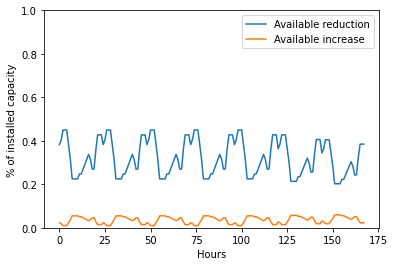

In [20]:
plt.figure()
plt.plot(Aturbindcool[:168],label="Available reduction")
plt.plot(Apumpindcool[:168],label="Available increase")
plt.ylabel("% of installed capacity")
plt.xlabel("Hours")
plt.ylim((0,1))
plt.legend()
plt.show()

## Cross-tech Ventilation

In [21]:
capavent = 1596/7008 * 1e3
prix = 16 #euro/MW
duree = 1 #h
Nact = 364
caracvent = [prix,capavent,duree,Nact]
caracvent

[16, 227.73972602739727, 1, 364]

In [22]:
Aturbvent = []
Apumpvent = []
for h in range(year):
    day = h // 24
    if day % 7 == 5:
        #samedi
        d = 0.6
    elif day % 7 == 6:
        #dimanche
        d = 0.5
    else:
        #weekdays
        d = 1
    Aturbvent.append(0.5*d)
    Apumpvent.append(0.1*(1-d))

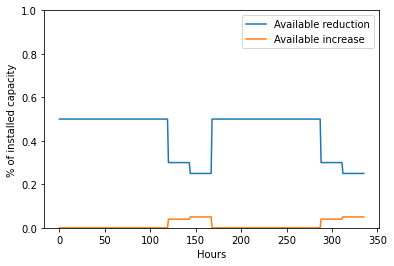

In [23]:
plt.figure()
plt.plot(Aturbvent[:336],label="Available reduction")
plt.plot(Apumpvent[:336],label="Available increase")
plt.ylabel("% of installed capacity")
plt.xlabel("Hours")
plt.ylim((0,1))
plt.legend()
plt.show()

# Températures 2050

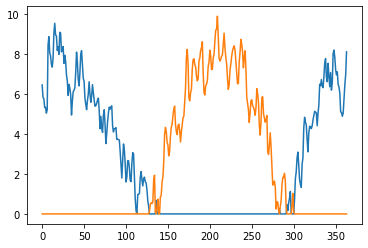

In [24]:
temps = pd.read_csv("../loadprofiles/temperature-quotidienne-regionale.csv",sep=";")
tempsmoy = temps.drop(columns=['TMin (°C)', 'TMax (°C)','Code INSEE région'])
tempsfrance=tempsmoy.groupby('Date').mean().reset_index()
tempsfranceaverage = np.zeros(364)
for i in range(len(tempsfrance['Date'])):
    tempsfranceaverage[i%364] += tempsfrance['TMoy (°C)'][i]/6 + 2/6 # Ajout 2°C pour réchauffement climtq

seuil = 15.5 #°C
nCDD = np.where(tempsfranceaverage-seuil > 0, tempsfranceaverage-seuil, 0)
nHDD = np.where(tempsfranceaverage-seuil < 0, seuil-tempsfranceaverage, 0)
plt.plot(nHDD)
plt.plot(nCDD)

## Tertiary cooling

In [25]:
Wcommerce = 123429*1e3 #MWh source SDES

#food retail+hotels/restau, storage
capaappli = [0.087*0.75*Wcommerce/5840 + 0.087*0.15*Wcommerce/5000,0.087*0.1*Wcommerce/5000] #MW
capaAC = 0.045*Wcommerce/550
capaappli
capaAC

10098.736363636364

In [26]:
indaycomcool = [0.80 for i in range(6)]+[0.89]+[1 for i in range(15)]+[0.89,0.80]
indaycoldstorage = [0.85,0.9,1,1,1,0.85,0.7,0.5,0.5,0.5,0.5,0.55,0.55,0.6,0.65,0.7,0.75,0.7,0.6,0.6,0.8,0.95,0.95,0.95]

In [27]:
Aturbcomcool = []
Apumpcomcool = []
for h in range(year):
    if h < debete or h > finete:
        multsaison = 0.9
    else:
        multsaison = 1
    Aturbcomcool.append(multsaison*indaycomcool[h%24])
    Apumpcomcool.append(multsaison*(1-indaycomcool[h%24]))

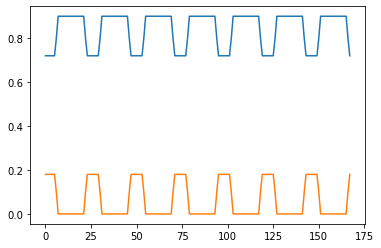

In [28]:
plt.plot(Aturbcomcool[:168])
plt.plot(Apumpcomcool[:168])

In [29]:
Aturbcolsto = []
Apumpcolsto = []
for h in range(year):
    if h < debete or h > finete:
        multsaison = 0.9
    else:
        multsaison = 1
    day = h // 24
    if day % 7 == 5:
        #samedi
        d = 0.95
    elif day % 7 == 6:
        #dimanche
        d = 0.9
    else:
        #weekdays
        d = 1
    Aturbcolsto.append(multsaison*d*indaycoldstorage[h%24])
    Apumpcolsto.append(1-multsaison*d*indaycoldstorage[h%24])

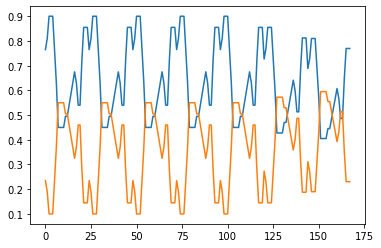

In [30]:
plt.plot(Aturbcolsto[:168])
plt.plot(Apumpcolsto[:168])

In [31]:
colddemday = np.zeros(364)
for i in range(1,364):
    colddemday[i] = ( nCDD[i] + 0.5*nCDD[i-1] ) / (1.5 * np.sum(nCDD))
maxcolddemday = np.max(colddemday)

usageAC = np.zeros(year)
for h in range(year):
    day = h // 24
    if colddemday[day] > 0.6*maxcolddemday:
        usageAC[h] = 0.75
    else:
        usageAC[h] = 1.25 * colddemday[day]/maxcolddemday
coefheure = np.array([12,10,7,5,4,3,7,9,11,15,24,33,46,64,82,95,100,98,84,59,48,32,24,17])/100

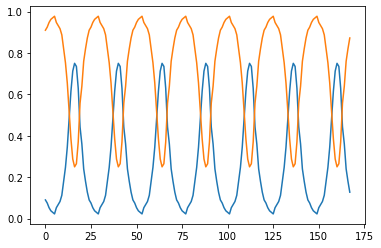

In [32]:
AturbAC = []
ApumpAC = []
for h in range(year):
    AturbAC.append(usageAC[h]*coefheure[h%24])
    ApumpAC.append(1-usageAC[h]*coefheure[h%24] if usageAC[h] > 0.01 else 0)
plt.plot(AturbAC[5016:5184])
plt.plot(ApumpAC[5016:5184])

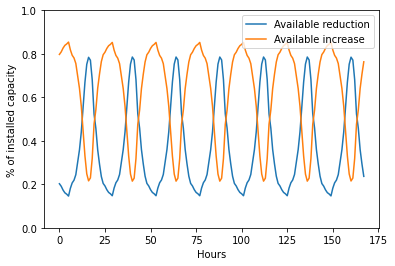

[11, 12014.717967403487, 1, 364]

In [33]:
#On aggrège les trois sources de flexibilité 
#dans le cooling tertiaire
capatertiarycool = capaAC + np.sum(capaappli)
Aturbtertiarycool = []
Apumptertiarycool = []
for h in range(year):
    Aturbtertiarycool.append((capaAC*AturbAC[h]+capaappli[0]*Aturbcomcool[h]+capaappli[1]*Aturbcolsto[h])/(capatertiarycool))
    Apumptertiarycool.append((capaAC*ApumpAC[h]+capaappli[0]*Apumpcomcool[h]+capaappli[1]*Apumpcolsto[h])/capatertiarycool)


plt.figure()
plt.plot(Aturbtertiarycool[5016:5184],label="Available reduction")
plt.plot(Apumptertiarycool[5016:5184],label="Available increase")
plt.ylabel("% of installed capacity")
plt.xlabel("Hours")
plt.ylim((0,1))
plt.legend()
plt.show()

prix = 11 #euro/MW
duree = 1 #h
Nact = 364
caractertiarycool = [prix,capatertiarycool,duree,Nact]
caractertiarycool

## Tertiary heating

In [34]:
capaSH = 0.05*Wcommerce/450
capaHW = 0.015*Wcommerce/300

In [35]:
heatdemday = np.zeros(364)
heatdemday[0] = nHDD[0] / np.sum(nHDD)
for i in range(1,364):
    heatdemday[i] = ( nHDD[i] + 0.5*nHDD[i-1] ) / (1.5 * np.sum(nHDD))
maxheatdemday = np.max(heatdemday)
usageheat = np.zeros(year)
c=0
for h in range(year):
    day = h // 24
    if heatdemday[day] > 0.6*maxheatdemday:
        usageheat[h] = 0.75
        c+=1
    else:
        usageheat[h] = 1.25 * heatdemday[day]/maxheatdemday

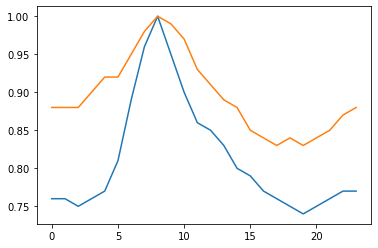

In [36]:
intradayHWweek = [0.76,0.76,0.75,0.76,0.77,0.81,0.89,0.96,1,0.95,0.9,0.86,0.85,0.83,0.8,0.79,0.77,0.76,0.75,0.74,0.75,0.76,0.77,0.77]
intradayHWend = [0.88,0.88,0.88,0.9,0.92,0.92,0.95,0.98,1,0.99,0.97,0.93,0.91,0.89,0.88,0.85,0.84,0.83,0.84,0.83,0.84,0.85,0.87,0.88]
plt.plot(intradayHWweek)
plt.plot(intradayHWend)

In [37]:
usagetempheat = pd.read_csv('../loadprofiles/usageheattemp.txt', sep=" ", header=None)
mine = usagetempheat.drop([0,6,12,13],axis=1)
mine.columns = ['<0 W','0-5 W','5-10 W','10-15 W','>15 W',
               '<0 E','0-5 E','5-10 E','10-15 E','>15 E']
isweek = [1,1,1,1,1,0,0]
mine

,<0 W,0-5 W,5-10 W,10-15 W,>15 W,<0 E,0-5 E,5-10 E,10-15 E,>15 E
0,0.73,0.69,0.68,0.65,0.76,0.84,0.83,0.82,0.82,0.88
1,0.72,0.68,0.66,0.63,0.76,0.82,0.80,0.80,0.81,0.88
2,0.71,0.69,0.68,0.64,0.75,0.84,0.82,0.80,0.82,0.88
3,0.73,0.69,0.69,0.66,0.76,0.84,0.83,0.82,0.83,0.90
4,0.75,0.72,0.71,0.68,0.77,0.85,0.85,0.83,0.83,0.92
5,0.80,0.77,0.76,0.74,0.81,0.87,0.87,0.84,0.86,0.92
6,0.88,0.87,0.87,0.86,0.89,0.91,0.92,0.90,0.93,0.95
7,0.96,0.97,0.96,0.97,0.96,0.95,0.96,0.95,0.97,0.98
8,1.00,1.00,1.00,1.00,1.00,0.97,0.98,0.98,0.99,1.00
9,1.00,0.99,0.97,0.94,0.95,1.00,1.00,1.00,1.00,0.99


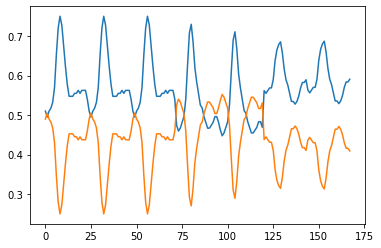

In [38]:
AturbSH=np.zeros(year)
AturbHW=np.zeros(year)
ApumpSH=np.zeros(year)
ApumpHW=np.zeros(year)
for h in range(year):
    day = h // 24
    daytype = day % 7
    tempsav = tempsfranceaverage[day]
    if tempsav <0:
        AturbSH[h] = (isweek[daytype]*mine['<0 W'][h%24] + (1-isweek[daytype])*mine['<0 E'][h%24])*usageheat[h]
        ApumpSH[h] = (1-(isweek[daytype]*mine['<0 W'][h%24] + (1-isweek[daytype])*mine['<0 E'][h%24])*usageheat[h]) if usageheat[h]>0.01 else 0
    if tempsav <5 and tempsav >0:
        AturbSH[h] = (isweek[daytype]*mine['0-5 W'][h%24] + (1-isweek[daytype])*mine['0-5 E'][h%24])*usageheat[h]
        ApumpSH[h] =(1-(isweek[daytype]*mine['0-5 W'][h%24] + (1-isweek[daytype])*mine['0-5 E'][h%24])*usageheat[h]) if usageheat[h]>0.01 else 0
    if tempsav <10 and tempsav >5:
        AturbSH[h] = (isweek[daytype]*mine['5-10 W'][h%24] + (1-isweek[daytype])*mine['5-10 E'][h%24])*usageheat[h]
        ApumpSH[h] =(1-(isweek[daytype]*mine['5-10 W'][h%24] + (1-isweek[daytype])*mine['5-10 E'][h%24])*usageheat[h]) if usageheat[h]>0.01 else 0
    if tempsav <15 and tempsav >10:
        AturbSH[h] = (isweek[daytype]*mine['10-15 W'][h%24] + (1-isweek[daytype])*mine['10-15 E'][h%24])*usageheat[h]
        ApumpSH[h] =(1-(isweek[daytype]*mine['10-15 W'][h%24] + (1-isweek[daytype])*mine['10-15 E'][h%24])*usageheat[h]) if usageheat[h]>0.01 else 0
    if tempsav >15:
        AturbSH[h] = (isweek[daytype]*mine['>15 W'][h%24] + (1-isweek[daytype])*mine['>15 E'][h%24])*usageheat[h]
        ApumpSH[h] =(1-(isweek[daytype]*mine['>15 W'][h%24] + (1-isweek[daytype])*mine['>15 E'][h%24])*usageheat[h]) if usageheat[h]>0.01 else 0
    AturbHW[h] = (isweek[daytype]*intradayHWweek[h%24] + (1-isweek[daytype])*intradayHWend[h%24])*(usageheat[h] if usageheat[h]>0.01 else 0)
    ApumpHW[h] = (1-(isweek[daytype]*intradayHWweek[h%24] + (1-isweek[daytype])*intradayHWend[h%24])*usageheat[h]) if usageheat[h]>0.01 else 0

plt.plot(AturbSH[:168])
plt.plot(ApumpSH[:168])
#plt.plot(AturbHW)
#plt.plot(ApumpHW)

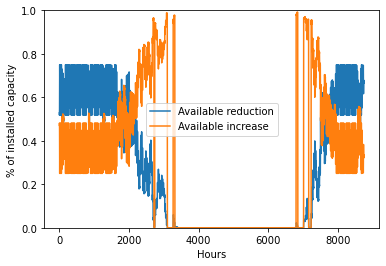

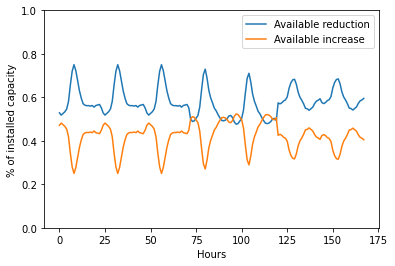

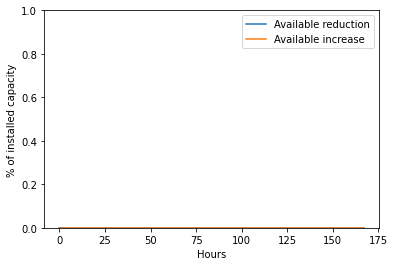

[11, 19885.783333333333, 4, 364]

In [39]:
#On aggrège les deux sources de flexibilité 
#dans le heating tertiaire
Aturbtertiaryheat = (capaSH*AturbSH + AturbHW * capaHW)/(capaSH + capaHW)
Apumptertiaryheat = (capaSH*ApumpSH + capaHW*ApumpHW)/(capaSH+capaHW)


plt.figure()
plt.plot(Aturbtertiaryheat,label="Available reduction")
plt.plot(Apumptertiaryheat,label="Available increase")
plt.ylabel("% of installed capacity")
plt.xlabel("Hours")
plt.ylim((0,1))
plt.legend()
plt.show()

plt.figure()
plt.plot(Aturbtertiaryheat[:168],label="Available reduction")
plt.plot(Apumptertiaryheat[:168],label="Available increase")
plt.ylabel("% of installed capacity")
plt.xlabel("Hours")
plt.ylim((0,1))
plt.legend()
plt.show()

plt.figure()
plt.plot(Aturbtertiaryheat[5016:5184],label="Available reduction")
plt.plot(Apumptertiaryheat[5016:5184],label="Available increase")
plt.ylabel("% of installed capacity")
plt.xlabel("Hours")
plt.ylim((0,1))
plt.legend()
plt.show()


capatertiarycool = capaSH + capaHW
prix = 11 #euro/MW
duree = 4 #h
Nact = 364
caractertiaryheat = [prix,capatertiarycool,duree,Nact]
caractertiaryheat

## Residential cooling

In [40]:
taux_croiss_pop = 71964/65781 #hypothèse croissance faible INSEE
taux_croiss_pop

1.093993706389383

In [41]:
nHH = taux_croiss_pop*30.83 * 1e6 #nombre de foyers
capfreeze=(0.86*40 + 1*300) *nHH/1e6
capAC=0.05*4000*500/year * nHH/1e6  #generalisation des climatisations à cause du CC mais efficacité énerg
caparescool = capfreeze + capAC #MW
prix = 11 #euro/MW
duree = 1 #h
Nact = 364
caracrescool = [prix,caparescool,duree,Nact]
caracrescool

[11, 11664.663597649942, 1, 364]

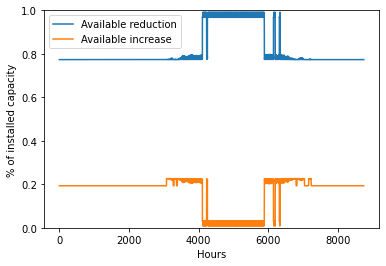

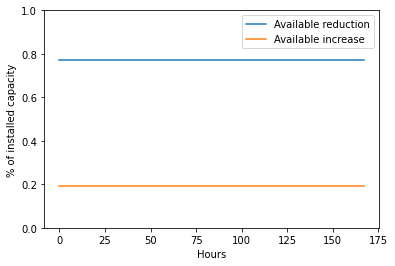

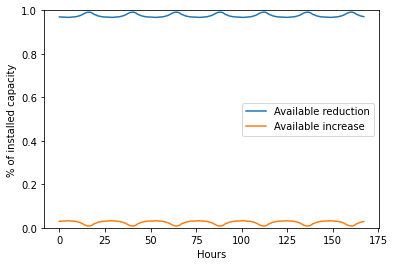

In [42]:
Aturbfreeze = np.ones(year)
for h in range(year):
    day=h//24
    if colddemday[day] < 0.6*maxcolddemday:
        Aturbfreeze[h] = 0.8
    else:
        Aturbfreeze[h] = 1

Apumpfreeze = 1-Aturbfreeze
Aturbrescool = (capfreeze*Aturbfreeze + capAC*np.array(AturbAC)) / caparescool
Apumprescool = (capfreeze*Apumpfreeze + capAC*np.array(ApumpAC)) / caparescool
plt.figure()
plt.plot(Aturbrescool,label="Available reduction")
plt.plot(Apumprescool,label="Available increase")
plt.ylabel("% of installed capacity")
plt.xlabel("Hours")
plt.ylim((0,1))
plt.legend()
plt.show()
plt.figure()
plt.plot(Aturbrescool[:168],label="Available reduction")
plt.plot(Apumprescool[:168],label="Available increase")
plt.ylabel("% of installed capacity")
plt.xlabel("Hours")
plt.ylim((0,1))
plt.legend()
plt.show()
plt.figure()
plt.plot(Aturbrescool[5016:5184],label="Available reduction")
plt.plot(Apumprescool[5016:5184],label="Available increase")
plt.ylabel("% of installed capacity")
plt.xlabel("Hours")
plt.ylim((0,1))
plt.legend()
plt.show()

## Residential heating

In [43]:
capresSH= 0.01*14000*nHH/1e6
capresHW=0.25*2000*nHH/1e6
caprespump=0.8*100*nHH/1e6 
caparesheat =  capresSH +capresHW + caprespump #MW
prix = 11 #euro/MW
duree = 1 #h
Nact = 364
caracresheat = [prix,caparesheat,duree,Nact]
caracresheat

[11, 24284.03469694897, 1, 364]

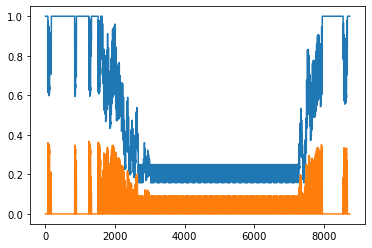

In [44]:
Aturbpump = np.zeros(year)
Apumppump = np.zeros(year)
for h in range(year):
    day = h // 24
    demchal = heatdemday[day]
    daytype = day % 7
    tempsav = tempsfranceaverage[day]
    if tempsav <0:
        mult = (isweek[daytype]*mine['<0 W'][h%24] + (1-isweek[daytype])*mine['<0 E'][h%24])
    if tempsav <5 and tempsav >0:
        mult = (isweek[daytype]*mine['0-5 W'][h%24] + (1-isweek[daytype])*mine['0-5 E'][h%24])
    if tempsav <10 and tempsav >5:
        mult = (isweek[daytype]*mine['5-10 W'][h%24] + (1-isweek[daytype])*mine['5-10 E'][h%24])
    if tempsav <15 and tempsav >10:
        mult = (isweek[daytype]*mine['10-15 W'][h%24] + (1-isweek[daytype])*mine['10-15 E'][h%24])
    if tempsav >15:
        mult = (isweek[daytype]*mine['10-15 W'][h%24] + (1-isweek[daytype])*mine['10-15 E'][h%24])
        
    if demchal < 0.15*maxheatdemday:
        Aturbpump[h] = 0.25 * mult
        Apumppump[h] = 0.25 * (1-mult)
    if demchal >0.15*maxheatdemday and demchal < 0.6*maxheatdemday:
        Aturbpump[h] = 1.67*demchal/maxheatdemday * mult
        Apumppump[h] = 1.67 * demchal/maxheatdemday*(1-mult)
    if demchal > 0.6*maxheatdemday:
        Aturbpump[h] = 1

plt.plot(Aturbpump)
plt.plot(Apumppump)

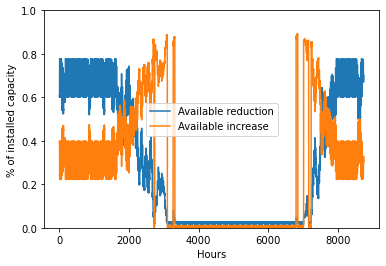

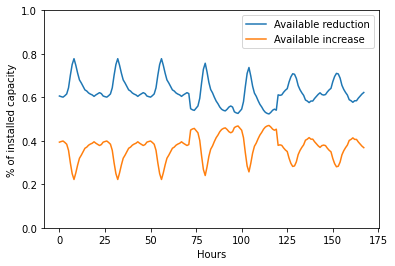

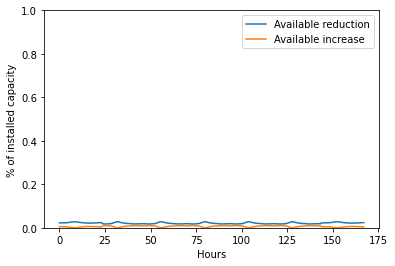

In [45]:
Aturbresheat = (capresHW*AturbHW + capresSH*AturbSH + caprespump*Aturbpump) / caparesheat
Apumpresheat = (capresHW*ApumpHW + capresSH*ApumpSH + caprespump*Apumppump) / caparesheat

plt.figure()
plt.plot(Aturbresheat,label="Available reduction")
plt.plot(Apumpresheat,label="Available increase")
plt.ylabel("% of installed capacity")
plt.xlabel("Hours")
plt.ylim((0,1))
plt.legend()
plt.show()
plt.figure()
plt.plot(Aturbresheat[:168],label="Available reduction")
plt.plot(Apumpresheat[:168],label="Available increase")
plt.ylabel("% of installed capacity")
plt.xlabel("Hours")
plt.ylim((0,1))
plt.legend()
plt.show()
plt.figure()
plt.plot(Aturbresheat[5016:5184],label="Available reduction")
plt.plot(Apumpresheat[5016:5184],label="Available increase")
plt.ylabel("% of installed capacity")
plt.xlabel("Hours")
plt.ylim((0,1))
plt.legend()
plt.show()

## V2G

In [46]:
percent_EV_reachable = 0.5
capav2g = percent_EV_reachable*80000/year * 1e3 #MW
prix = 10
duree = 4 #h
Nact = 364
caracv2g = [prix,capav2g,duree,Nact]
caracv2g

[10, 4578.754578754579, 4, 364]

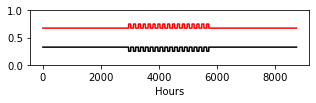

In [47]:
Aturbv2g = 0.9*0.75*np.ones(year)
for h in range(year):
    day = h // 24
    mois = day // 30
    if day % 7 == 4 or day % 7 == 5 or day % 7 == 6 : #weekend
        if mois == 4 or mois == 5 or mois == 6 or mois == 7: #mai, juin, juillet, aout
            Aturbv2g[h] = 0.75
            
Apumpv2g = 1-Aturbv2g

plt.figure(figsize=(5,1))
plt.plot(Aturbv2g,label="Available reduction",color='red')
plt.plot(Apumpv2g,label="Available increase",color='black')
#plt.ylabel("% of installed capacity")
plt.xlabel("Hours")
plt.ylim((0,1))
#plt.legend(loc='upper right')
plt.show()

# Export des données

In [48]:
df_avail_pump_shift = pd.DataFrame({"Tech. 0":Apumpcement,
                                  "Tech. 1":Apumppaper,
                                  "Tech. 2":Apumpindcool,
                                  "Tech. 3":Apumpvent,
                                  "Tech. 4":Apumptertiarycool,
                                  "Tech. 5":Apumptertiaryheat,
                                  "Tech. 6":Apumprescool,
                                  "Tech. 7":Apumpresheat,
                                  "Tech. 8":Apumpv2g
                                 })
df_avail_pump_shift.to_csv("loadshifting_pump_availability.csv")

In [49]:
df_avail_shifting_turb = pd.DataFrame({"Tech. 0":Aturbcement,
                                       "Tech. 1":Aturbpaper,
                                       "Tech. 2":Aturbindcool,
                                       "Tech. 3":Aturbvent,
                                       "Tech. 4":Aturbtertiarycool,
                                       "Tech. 5":Aturbtertiaryheat,
                                       "Tech. 6":Aturbrescool,
                                       "Tech. 7":Aturbresheat,
                                       "Tech. 8":Aturbv2g
                                 })

df_avail_shifting_turb.to_csv("loadshifting_turb_availability.csv")

In [50]:
df_carac_shift = pd.DataFrame({"Cement":caraccement,
                             "Paper and pulp":caracpaper,
                             "Indus cooling":caracindcool,
                             "Cross-tech ventilation":caracvent,
                             "Tertiary cooling":caractertiarycool,
                             "Tertiary heating":caractertiaryheat,
                            "Residential cooling":caracrescool,
                             "Residential heating":caracresheat,
                              "V2G":caracv2g},
                             index = ["PrixAct","CapaInst","Duree","NAct"])
bon = df_carac_shift.T
bon

,PrixAct,CapaInst,Duree,NAct
Cement,10.0,337.659217,3.0,260.0
Paper and pulp,10.0,1366.210046,3.0,260.0
Indus cooling,16.0,904.965753,1.0,364.0
Cross-tech ventilation,16.0,227.739726,1.0,364.0
Tertiary cooling,11.0,12014.717967,1.0,364.0
Tertiary heating,11.0,19885.783333,4.0,364.0
Residential cooling,11.0,11664.663598,1.0,364.0
Residential heating,11.0,24284.034697,1.0,364.0
V2G,10.0,4578.754579,4.0,364.0


In [56]:
bon['Size'] = bon['NAct']*bon['CapaInst']*bon['Duree']
bon

,PrixAct,CapaInst,Duree,NAct,Capamoy,Size
Cement,10.0,337.659217,3.0,260.0,121.713006,2.633742e+05
Paper and pulp,10.0,1366.210046,3.0,260.0,1080.605624,1.065644e+06
Indus cooling,16.0,904.965753,1.0,364.0,309.520896,3.294075e+05
Cross-tech ventilation,16.0,227.739726,1.0,364.0,99.229452,8.289726e+04
Tertiary cooling,11.0,12014.717967,1.0,364.0,2602.883523,4.373357e+06
Tertiary heating,11.0,19885.783333,4.0,364.0,4998.630124,2.895370e+07
Residential cooling,11.0,11664.663598,1.0,364.0,9530.086296,4.245938e+06
Residential heating,11.0,24284.034697,1.0,364.0,6830.051933,8.839389e+06
V2G,10.0,4578.754579,4.0,364.0,3138.774001,6.666667e+06


In [51]:
cmoy = []
for i,tech in enumerate(list(bon.index)):
    cmoy.append(np.mean(bon['CapaInst'].loc[tech] * np.array(df_avail_shifting_turb["Tech. %s"%i])))

In [52]:
bon['Capamoy'] = cmoy
bon

,PrixAct,CapaInst,Duree,NAct,Capamoy
Cement,10.0,337.659217,3.0,260.0,121.713006
Paper and pulp,10.0,1366.210046,3.0,260.0,1080.605624
Indus cooling,16.0,904.965753,1.0,364.0,309.520896
Cross-tech ventilation,16.0,227.739726,1.0,364.0,99.229452
Tertiary cooling,11.0,12014.717967,1.0,364.0,2602.883523
Tertiary heating,11.0,19885.783333,4.0,364.0,4998.630124
Residential cooling,11.0,11664.663598,1.0,364.0,9530.086296
Residential heating,11.0,24284.034697,1.0,364.0,6830.051933
V2G,10.0,4578.754579,4.0,364.0,3138.774001


In [53]:
bon.to_csv("carac_shifting.csv")

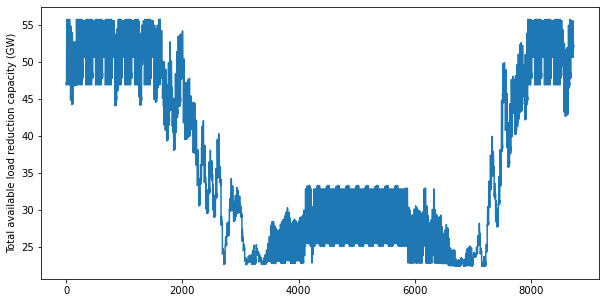

In [54]:
total_dr_turb = np.zeros(8736)
for i,tech in enumerate(df_carac_shift.T.index):
    total_dr_turb+= df_carac_shift.T['CapaInst'].loc[tech] * np.array(df_avail_shifting_turb["Tech. %s"%i])
for i,tech in enumerate(df_carac_shed.T.index):
    total_dr_turb+= df_carac_shed.T['CapaInst'].loc[tech] * np.array(df_avail_shedding["Tech. %s"%i])

plt.figure(figsize=(10,5))
plt.plot(total_dr_turb/1e3)
plt.ylabel("Total available load reduction capacity (GW)")
plt.show()